# Задание для стажировки VK на позиция ML-инженер 

***Задание***<br>
Дан [датасет](https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data), на основе этого датасета построить рекомендательную систему релевантных треков для пользователя и оценить её качество. В качестве матрики качетва использовать **NDCG@20**

## 1) Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## 2) Анализ и обработка данных

### Members

In [2]:
members = pd.read_csv('members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [3]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [4]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [5]:
members.drop(columns=['gender'], inplace=True)

In [6]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)
members.head()

,msno,city,bd,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,7,20,2011,8,20,2017,9
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,7,22,2015,6,28,2017,6
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,4,12,2016,4,11,2017,7
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,9,7,2015,9,6,2015,9
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,4,13,2017,1,26,2017,6


In [7]:
members.describe()

,city,bd,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
count,34403.000000,34403.000000,34403.000000,34403.000000,34403.000000,34403.000000,34403.000000,34403.000000,34403.000000
mean,5.371276,12.280935,5.953376,15.349301,2013.926751,6.593408,15.861437,2016.821876,7.729326
std,6.243929,18.170251,2.287534,8.829568,2.958737,3.996440,8.781187,0.738937,3.249545
min,1.000000,-43.000000,3.000000,1.000000,2004.000000,1.000000,1.000000,1970.000000,1.000000
25%,1.000000,0.000000,4.000000,8.000000,2012.000000,2.000000,8.000000,2017.000000,6.000000
50%,1.000000,0.000000,7.000000,15.000000,2015.000000,7.000000,16.000000,2017.000000,9.000000
75%,10.000000,25.000000,9.000000,22.000000,2016.000000,10.000000,23.000000,2017.000000,10.000000
max,22.000000,1051.000000,16.000000,31.000000,2017.000000,12.000000,31.000000,2020.000000,12.000000


<Axes: >

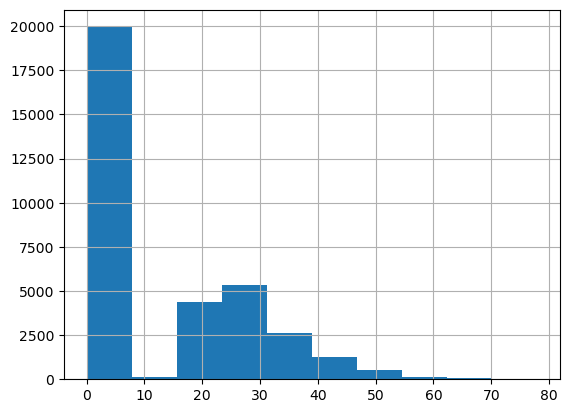

In [8]:
members = members[members['bd'] >= 0]
members = members[members['bd'] <= 80]
members['bd'].hist(bins=10)

<Axes: >

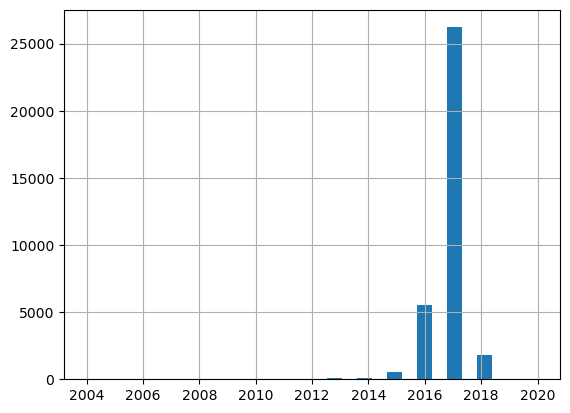

In [9]:
members = members[members['expiration_year'] >= 2000]
members['expiration_year'].hist(bins=30)

In [10]:
members.describe()

,city,bd,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
count,34367.000000,34367.000000,34367.000000,34367.000000,34367.000000,34367.000000,34367.000000,34367.000000,34367.000000
mean,5.366427,12.119184,5.954113,15.349318,2013.926819,6.593534,15.862222,2016.823464,7.729421
std,6.241238,15.394171,2.287126,8.830014,2.958908,3.996678,8.781748,0.692994,3.249230
min,1.000000,0.000000,3.000000,1.000000,2004.000000,1.000000,1.000000,2004.000000,1.000000
25%,1.000000,0.000000,4.000000,8.000000,2012.000000,2.000000,8.000000,2017.000000,6.000000
50%,1.000000,0.000000,7.000000,15.000000,2015.000000,7.000000,16.000000,2017.000000,9.000000
75%,10.000000,25.000000,9.000000,22.000000,2016.000000,10.000000,23.000000,2017.000000,10.000000
max,22.000000,78.000000,16.000000,31.000000,2017.000000,12.000000,31.000000,2020.000000,12.000000


In [11]:
members.head()

,msno,city,bd,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,7,20,2011,8,20,2017,9
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,7,22,2015,6,28,2017,6
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,4,12,2016,4,11,2017,7
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,9,7,2015,9,6,2015,9
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,4,13,2017,1,26,2017,6


После первичного анализа и обработки датафрейма members, был убран столбец genre, поскольку он содержал 19902 пропусков из 34403 значений, что явлется около 58% пропусков. Столбцы дат регистрации и истечения были переведены в другой формат и очищены от вбросов. Также от вбросов был очищен столбец возроста, хочется отметить, что большинство данных в столбце возраста нулевые.

### Train

In [12]:
train = pd.read_csv('train.csv')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [14]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [15]:
train['source_system_tab'].fillna(train['source_system_tab'].mode()[0], inplace=True)
train['source_type'].fillna(train['source_type'].mode()[0], inplace=True)

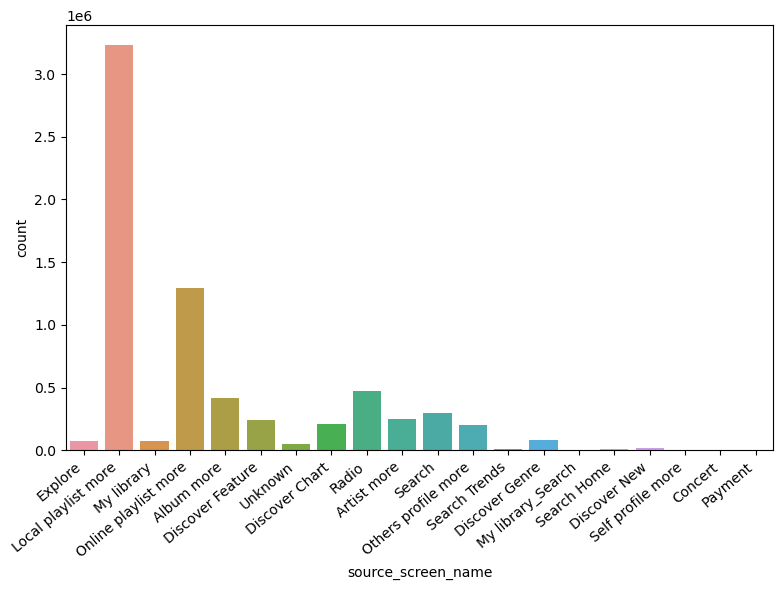

In [16]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "source_screen_name", data = train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [17]:
train.drop(columns=['source_screen_name'], inplace=True)

In [18]:
train.head()

,msno,song_id,source_system_tab,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,online-playlist,1


В результате первиного анализа и обработки были заполнены пропуски в столбцах  source_system_tab и source_type модой, а также был удален столбец source_screen_name из-за большого количества пропусков.

### Songs

In [19]:
songs = pd.read_csv('songs.csv')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [20]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [21]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071358
lyricist       1945306
language             1
dtype: int64

In [22]:
def composer_count(x):
    if x == 'no_composer':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

def lyricist_count(x):
    if x == 'no_lyricist':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1
    

def genre_id_count(x):
    return x.count('|') + 1

def artist_count(x):
    return x.count('and') + x.count(',') + x.count('feat') + x.count('&') + 1

In [23]:
songs['genre_ids'].fillna(songs['genre_ids'].mode()[0], inplace=True)
songs['count_genre_ids'] = songs['genre_ids'].apply(genre_id_count)
songs['genre_ids'] = songs['genre_ids'].str.split('|').str[0]
songs['genre_ids'] = songs['genre_ids'].astype('int64')

<Axes: >

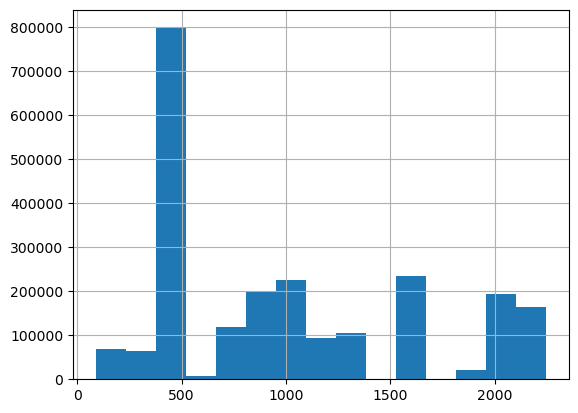

In [24]:
songs['genre_ids'].hist(bins=15)

In [25]:
songs['language'].fillna(songs['language'].mode()[0], inplace=True)
songs['language'] = songs['language'].astype('int64')
songs = songs[songs['language'] > 0]

In [26]:
songs['composer'].fillna('no_composer', inplace=True)
songs['lyricist'].fillna('no_lyricist', inplace=True)

In [27]:
songs['composer_count'] = songs['composer'].apply(composer_count)
songs['lyricist_count'] = songs['lyricist'].apply(lyricist_count)
songs['artist_count'] = songs['artist_name'].apply(artist_count)

In [28]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,count_genre_ids,composer_count,lyricist_count,artist_count
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3,1,1,1,1
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31,1,3,1,1
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,no_composer,no_lyricist,31,1,0,0,1
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3,1,1,1,1
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52,1,1,1,1


В результате анализа и обработки датафрейма songs, были заполнены пропуски в данных, а ткаже добавлены новые фичи, указывающие на количество человек участвующих в создание песни

## 3) Валидирование модели

In [31]:
data = train.merge(members, how='inner', on='msno')
data = data.merge(songs, how='inner', on='song_id')
data.head()

,msno,song_id,source_system_tab,source_type,target,city,bd,registered_via,expiration_date,registration_year,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_genre_ids,composer_count,lyricist_count,artist_count
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,online-playlist,1,1,0,7,5,2012,...,206471,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52,1,2,0,1
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,online-playlist,0,15,18,4,30,2015,...,206471,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52,1,2,0,1
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,local-library,1,1,0,7,4,2012,...,206471,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52,1,2,0,1
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,local-library,1,5,21,9,17,2011,...,206471,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52,1,2,0,1
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,local-library,0,6,33,9,15,2007,...,206471,359,Bastille,Dan Smith| Mark Crew,no_lyricist,52,1,2,0,1


In [32]:
print('Количество пользователей: ', len(data['msno'].unique()))
print('Количество песен: ', len(data['song_id'].unique()))

Количество пользователей:  30647
Количество песен:  288057
